In [1]:
# Install dependencies on colab
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00


In [2]:
# Connect to google drive to load images and save model
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *

# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in a2
- Use `set_seed()` to obtain reproducible results.
- Use `item_tfms` and/or `batch_tfms`. Set `min_scale` so that digits are still visible
- Use a batch size of 32

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

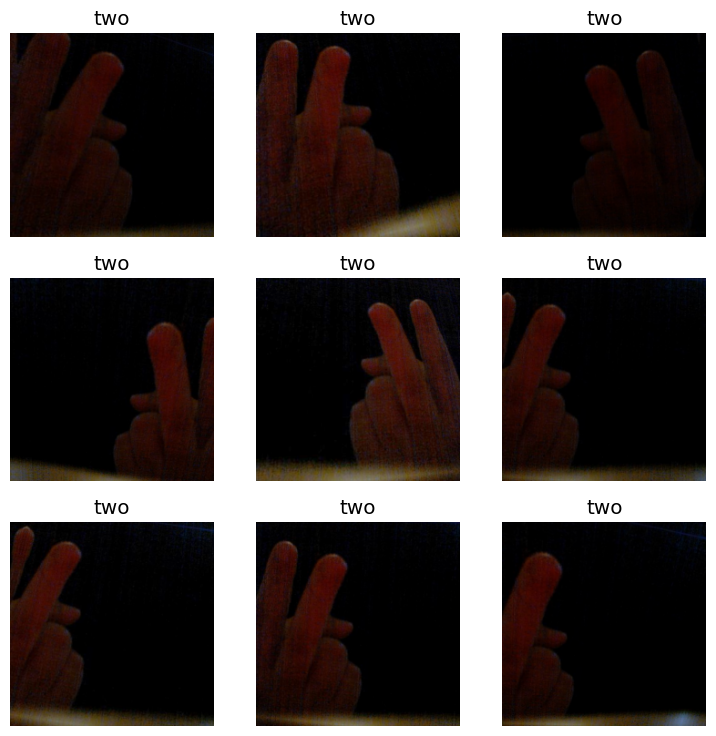

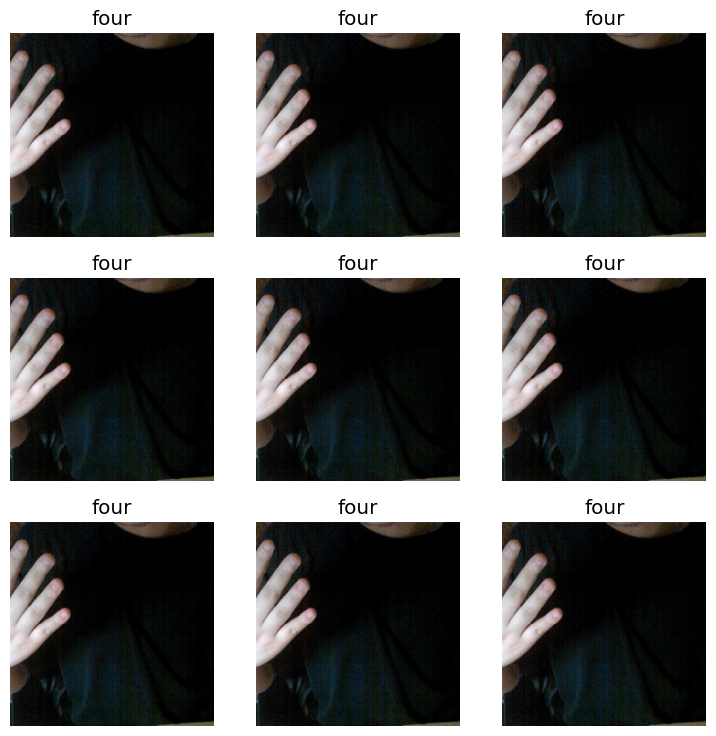

In [23]:
set_seed(42)

fingers = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_items = get_image_files,
                    splitter = GrandparentSplitter(train_name='train', valid_name='valid'),
                    item_tfms = Resize(460),
                    batch_tfms = aug_transforms(size=224, min_scale=0.75),
                    get_y = parent_label)

fingerload = fingers.dataloaders('/content/gdrive/MyDrive/digits', bs=32)

fingerload.train.show_batch(unique=True)
fingerload.valid.show_batch(unique=True)


### Question 1: What type of item and batch transforms did you use? Can you spot any problems in the training set augmentations, e.g. finger digits missing?

THe set was resized to 460x460. 'aug_transforms' was used for batch transforms, which includes flipping, rotation, warping, and brightness adjustments. In the training set you can see one of the digits is missing for one of the 'two' images.

# 2. Train the classifier

## 2.1 Impact of learning rate
With:
- Same `set_seed()` as above
- Re-creating the same DataLoaders as above
- ResNet18 architecture.
- error rate as metric.

Use three learning rates:
- small: 3e-5
- medium: 3e-3
- large: 1e-1

Train the model with each learning rate using `fine_tune` with 10-15 epochs


In [38]:
set_seed(42)

fingers = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_items = get_image_files,
                    splitter = GrandparentSplitter(train_name='train', valid_name='valid'),
                    item_tfms = Resize(460),
                    batch_tfms = aug_transforms(size=224, min_scale=0.75),
                    get_y = parent_label)

fingerload = fingers.dataloaders('/content/gdrive/MyDrive/digits', bs=32)

model = resnet18

learning_rates = [3e-5, 3e-3, 1e-1]

for lr in learning_rates:
  print(f"Training model with learning rate: {lr}")
  learn = vision_learner(fingerload, model, metrics=error_rate)
  learn.fine_tune(15, lr)
  train_error_rate = learn.validate(dl=fingerload.train)[1]
  valid_error_rate = learn.validate(dl=fingerload.valid)[1]
  print(f"Training error rate: {train_error_rate}, Validation error rate: {valid_error_rate} for learning rate: {lr}")
  print(f"Training completed for learning rate: {lr}")



Training model with learning rate: 3e-05


epoch,train_loss,valid_loss,error_rate,time
0,2.648044,2.137760,0.700000,00:05


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,2.816984,1.940145,0.840000,00:03
1,2.749248,2.006112,0.840000,00:06
2,2.707586,2.079656,0.860000,00:04
3,2.734563,2.123869,0.860000,00:04
4,2.745757,2.179997,0.860000,00:06
5,2.710974,2.165102,0.860000,00:04
6,2.711932,2.173131,0.880000,00:06
7,2.640877,2.151930,0.840000,00:03
8,2.657607,2.128087,0.840000,00:03
9,2.677136,2.072451,0.840000,00:05


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training error rate: 0.734375, Validation error rate: 0.8799999952316284 for learning rate: 3e-05
Training completed for learning rate: 3e-05
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,error_rate,time
0,2.615149,1.309638,0.440000,00:04


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,1.737148,1.147823,0.500000,00:04
1,1.561705,0.916144,0.320000,00:04
2,1.347718,0.865391,0.300000,00:04
3,1.160605,0.654358,0.280000,00:06
4,0.984807,0.788113,0.340000,00:03
5,0.867060,0.815637,0.240000,00:03
6,0.749719,0.909974,0.260000,00:05
7,0.675467,1.035825,0.400000,00:03
8,0.595537,1.434442,0.420000,00:04
9,0.558459,1.254556,0.380000,00:08


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training error rate: 0.02604166604578495, Validation error rate: 0.25999999046325684 for learning rate: 0.003
Training completed for learning rate: 0.003
Training model with learning rate: 0.1


epoch,train_loss,valid_loss,error_rate,time
0,2.512628,19.909601,0.620000,00:06


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,3.006100,11.070047,0.580000,00:03
1,2.821366,24.148806,0.500000,00:04
2,2.901586,51.420914,0.520000,00:05
3,2.818719,59.412910,0.760000,00:04
4,2.810373,32.098598,0.620000,00:04
5,2.679030,69.460472,0.680000,00:07
6,2.617382,128.184616,0.800000,00:05
7,2.697487,30.015425,0.840000,00:05
8,2.811606,2.226355,0.420000,00:05
9,2.749469,3.449916,0.560000,00:04


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training error rate: 0.203125, Validation error rate: 0.30000001192092896 for learning rate: 0.1
Training completed for learning rate: 0.1


### Question 2: Which training run resulted in the best model? State number of epochs and final error rate values for all learning rates and identify the best model.
The model with a learning rate of 0.003 performed the best out of the three models. Each model used 14 epochs.

| Model | Epochs | Final Error Rate |
|-------|--------|------------------|
| 3e-05 | 14     | 0.88             |
| 3e-03 | 14     | 0.26             |
| 1e-01 | 14     | 0.3              |


### Question 3: Did any models overfit? Include your reasoning.
The training error rates are needed, so the previous code was adjusted to provide the training error rates. The training error rates of all three models was larger than the validation error rates, which means all three models overfit.


# 3. Analyze model performance
- Retrain the best model from above.
- Plot the confusion matrix.
- Plot 10 top losses

In [39]:
  print(f"Training model with learning rate: {lr}")
  learn = vision_learner(fingerload, model, metrics=error_rate)
  learn.fine_tune(15, 3e-3)
  ##train_error_rate = learn.validate(dl=fingerload.train)[1]
  ##valid_error_rate = learn.validate(dl=fingerload.valid)[1]
  ##print(f"Training error rate: {train_error_rate}, Validation error rate: {valid_error_rate} for learning rate: {lr}")
  print(f"Training completed for learning rate: {lr}")

Training model with learning rate: 0.1


epoch,train_loss,valid_loss,error_rate,time
0,2.595133,1.502802,0.580000,00:06


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,1.595493,1.403075,0.680000,00:04
1,1.482405,1.141849,0.460000,00:06
2,1.328335,1.134022,0.440000,00:03
3,1.150380,1.098978,0.420000,00:04
4,1.045752,0.677493,0.200000,00:07
5,0.899412,0.788182,0.240000,00:07
6,0.788751,1.250217,0.360000,00:07
7,0.715202,1.274564,0.340000,00:04
8,0.628568,1.201846,0.360000,00:04
9,0.572292,1.033901,0.340000,00:05


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

Training completed for learning rate: 0.1


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


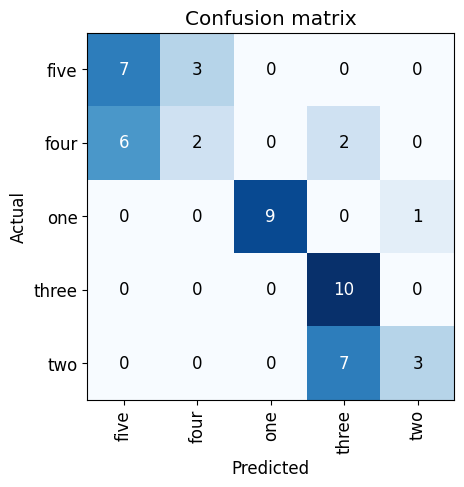

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


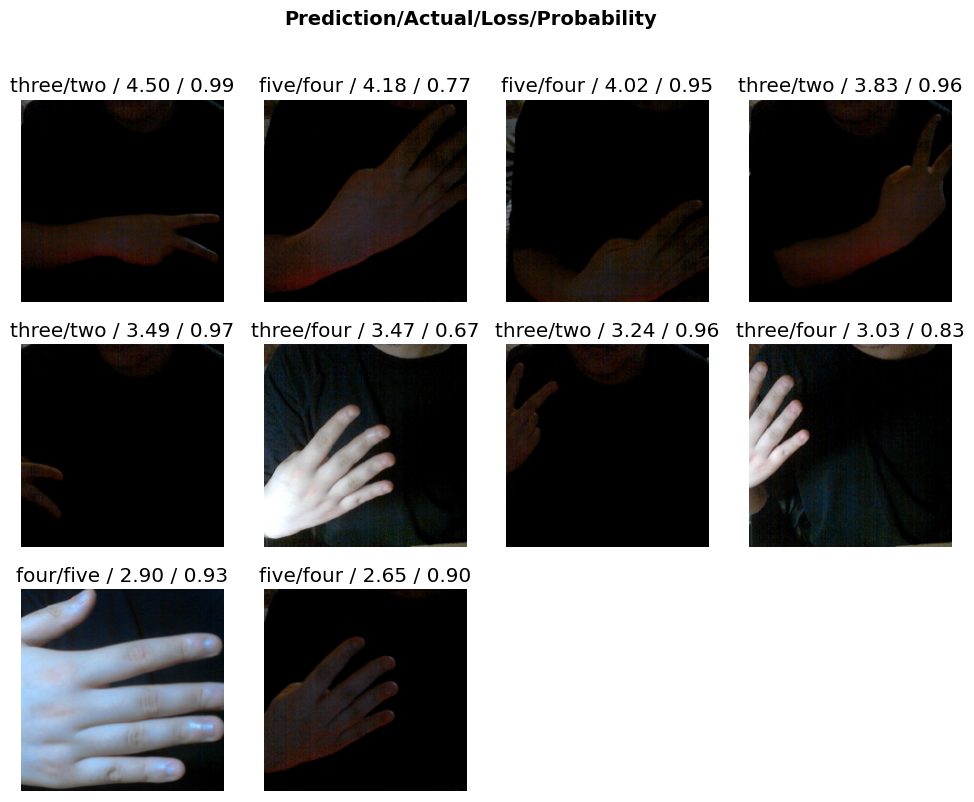

In [41]:
interp.plot_top_losses(10)

### Question 4: With which finger digits does your model have the most problems with?
The model struggled with 'two' and 'four' the most.


# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

In [45]:
learn.export('/content/gdrive/MyDrive/export.pkl')

In [46]:
learn_inf = load_learner('/content/gdrive/MyDrive/export.pkl')
learn_inf.predict('/content/gdrive/MyDrive/digits/valid/one/00000001.jpg')

('one',
 tensor(2),
 tensor([1.1237e-04, 1.5953e-03, 8.7911e-01, 2.2797e-03, 1.1691e-01]))

# 5. Summary and Conclusion

Summarize the best model:
- Training strategy: learning rate and epochs used.
- Error rate achieved, summary of confusion matrix, i.e. what kind of errors does the model make.

The best model used a learning rate of 3e-3, and ran for 14 epochs.
An error rate of 0.38 was achieved, and failed to differentiate four and five. It also failed to differentiate two.


Conclusion:
- Are you satisfied with model performance? Why, why not?

No, I was hoping for a maximum of a 10% error rate.


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

I liked seeing how the different learning rates changed the result of the model, but I hated iterating each model because it took some time to iterate. For some reason setting the seed still changed the model, as the second time I ran the optimal model I resulted in worse results.
